# Linear congruent generator
$$ r_{i+1} = (a r_i + b)~\mbox{mod}~m, \quad a,b \in \mathbb{N} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the generator
def LCG(a, b, m, r, N=1):
    x = np.zeros(N, dtype=int)
    
    for i in range(N):
        x[i] = (a*r + b) % m
        r = x[i]
    
    return x

## Example of spectral test (2D)

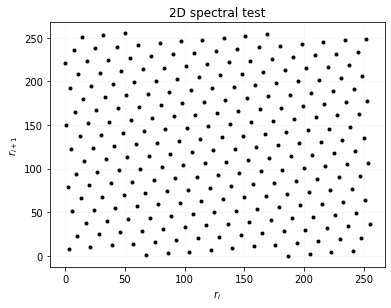

By plotting r_1 vs. r_(i+1) we clearly recognize an orderd pattern. Therefore it is not a good generator.


In [2]:
# Run LCG


N = 256      # This generator gives full period
m = 256
a = 137
b = 187
seed = 1

x = LCG(a, b, m, seed, N)
x_shift = np.roll(x, 1)


plt.figure(figsize=(6,4.5))
plt.plot(x, x_shift, '.k')
plt.grid(True, color='whitesmoke')
plt.xlabel('$r_{i}$')
plt.ylabel('$r_{i+1}$')
plt.title('2D spectral test')


#plt.savefig("LCG.pdf", format="pdf")
plt.show()


print('By plotting r_1 vs. r_(i+1) we clearly recognize an orderd pattern. Therefore it is not a good generator.')

## <u>Randu</u>
### 2D spectral test

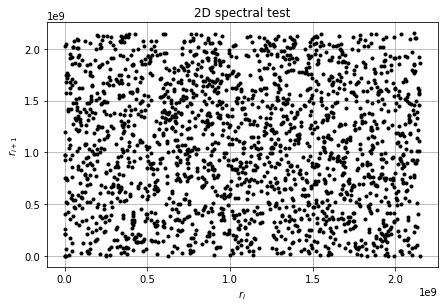

From this test, our LNG seems working well (non particular pattern recognized), but if we the dimension it does not!


In [3]:
# Run LCG


N = 2000
m = 2.0**31           # .0 to avoid warning "overflow encountered in long_scalars"
a = 65539.0
b = 0
seed = 1


x = LCG(a, b, m, seed, N)
x_shift = np.roll(x, 1)


plt.figure(figsize=(7,4.5))
plt.plot(x, x_shift, '.k')
plt.grid(True, )
plt.xlabel('$r_{i}$')
plt.ylabel('$r_{i+1}$')
plt.title('2D spectral test')


plt.show()


print('From this test, our LNG seems working well (non particular pattern recognized), but if we the dimension it does not!')

### 3D spectral test

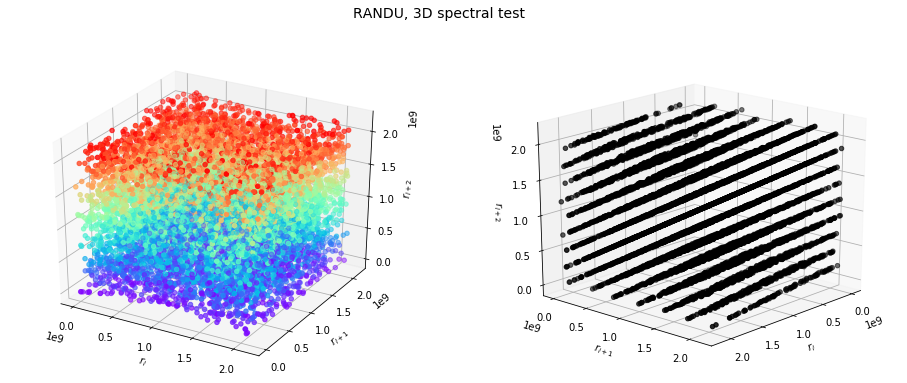

From the cube test (3D spectral test), a particular point of view shows how in reality these random numbers are not so good, because they distribute on parallel planes.


In [4]:
# Run LCG
from mpl_toolkits.mplot3d import Axes3D


N = 10000
m = 2.0**31
a = 65539.0
b = 0
seed = 1


x = LCG(a, b, m, seed, N)
x_shift = np.roll(x, 1)
x_shift_shift = np.roll(x, 2)


#%matplotlib qt      # For a dynamical rotation of the view
fig = plt.figure(figsize=(16,6))
fig.suptitle('RANDU, 3D spectral test', fontsize=14)


ax = fig.add_subplot(121, projection='3d')
ax.scatter(x, x_shift, x_shift_shift, c=x_shift_shift, cmap=plt.cm.rainbow)
ax.set_xlabel('$r_{i}$')
ax.set_ylabel('$r_{i+1}$')
ax.set_zlabel('$r_{i+2}$')

ax_r = fig.add_subplot(122, projection='3d')
ax_r.scatter(x, x_shift, x_shift_shift, c='k')
ax_r.set_xlabel('$r_{i}$')
ax_r.set_ylabel('$r_{i+1}$')
ax_r.set_zlabel('$r_{i+2}$')
ax_r.view_init(20, 42)


#plt.savefig("RANDU.pdf", format="pdf")
plt.show()


print('From the cube test (3D spectral test), a particular point of view shows how in reality these random numbers are not so good, because they distribute on parallel planes.')